In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('train_set_nostandard.csv')
training_set = dataset_train.iloc[:, 1:].values

      date  T10Y3M  curvature  BAMLCC0A1AAATRIV  DPRIME  VIXCLS          DJIA  \
0        0    1.35       0.21            207.57    8.25   21.14   6442.490234   
1        1    1.35       0.21            207.86    8.25   19.13   6544.089844   
2        2    1.37       0.23            207.66    8.25   19.89   6567.180176   
3        3    1.41       0.23            207.38    8.25   19.35   6600.660156   
4        4    1.44       0.26            207.16    8.25   20.24   6549.479980   
5        5    1.39       0.23            207.98    8.25   20.91   6625.669922   
6        6    1.46       0.32            206.76    8.25   19.63   6703.790039   
7        7    1.55       0.43            206.93    8.25   19.84   6709.180176   
8        8    1.34       0.24            208.04    8.25   19.27   6762.290039   
9        9    1.37       0.27            208.07    8.25   19.40   6726.879883   
10      10    1.41       0.27            207.57    8.25   19.61   6765.370117   
11      11    1.42       0.3

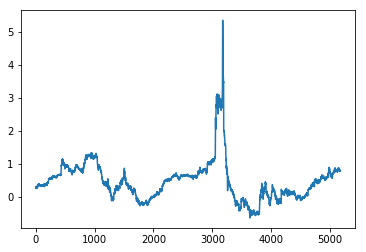

In [3]:
print(dataset_train)
plt.plot(training_set[:,-1])

[[0.47916667 0.67866324 0.00381123 ... 0.00207873 0.01621154 0.15141431]
 [0.47916667 0.67866324 0.00449348 ... 0.00610628 0.01587814 0.1547421 ]
 [0.48333333 0.68380463 0.00402296 ... 0.00636612 0.01662829 0.15141431]
 ...
 [0.52291667 0.51156812 0.95087752 ... 0.96258282 0.861035   0.23627288]
 [0.51041667 0.50642674 0.95226556 ... 0.96323243 0.87750701 0.24126456]
 [0.50625    0.49100257 0.95391239 ... 0.95400806 0.85511716 0.24126456]]


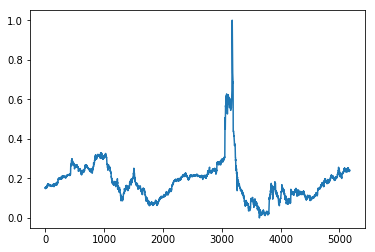

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#training_set_scaled =training_set
print(training_set_scaled)
plt.plot(training_set_scaled[:,-1])

In [5]:
n=dataset_train.shape[0]
m=3 # the better value for m is 60

X_train = []
y_train = []
for i in range(m+1, n):
    #X_train.append(np.concatenate((training_set_scaled[i-1, 0:-1],training_set_scaled[i-m-1:i-1, -1])))
    #X_train.append(training_set_scaled[i-1, 0:-1])  #only feature
    X_train.append(training_set_scaled[i-m-1:i-1, -1]) #only past spread
    y_train.append(training_set_scaled[i, -1])
#print(X_train)
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(5170, 3, 1)


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
u=100
d=0.3
regressor = Sequential()

regressor.add(LSTM(units = u, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u, return_sequences = True))
regressor.add(Dropout(d))

regressor.add(LSTM(units = u))
regressor.add(Dropout(d))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 5, batch_size = 8)

Epoch 1/5
5170/5170 [==============================] - 9s 2ms/step - loss: 0.0019
Epoch 2/5
5170/5170 [==============================] - 6s 1ms/step - loss: 8.3080e-04
Epoch 3/5
5170/5170 [==============================] - 6s 1ms/step - loss: 6.7881e-04
Epoch 4/5
5170/5170 [==============================] - 7s 1ms/step - loss: 6.6917e-04
Epoch 5/5
5170/5170 [==============================] - 6s 1ms/step - loss: 5.9299e-04


In [8]:
dataset_test = pd.read_csv('test_set_nostadard.csv')
real_price = dataset_test.iloc[:, -1].values

In [9]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
dataset_total.index = dataset_total.date 

In [10]:
print(len(dataset_test))

575


In [11]:
inputs = dataset_total.iloc[len(dataset_total) - len(dataset_test) - m:,1:].values
inputs

array([[ 1.56000e+00, -4.40000e-01,  6.10130e+02, ...,  9.60700e+01,
         9.63890e+02,  7.70000e-01],
       [ 1.50000e+00, -4.60000e-01,  6.10720e+02, ...,  9.61200e+01,
         9.79700e+02,  8.00000e-01],
       [ 1.48000e+00, -5.20000e-01,  6.11420e+02, ...,  9.54100e+01,
         9.58210e+02,  8.00000e-01],
       ...,
       [ 2.80000e-01, -4.00000e-02,  6.27910e+02, ...,  1.22470e+02,
         1.05219e+03,  7.90000e-01],
       [ 2.60000e-01, -1.00000e-01,  6.26220e+02, ...,  1.21770e+02,
         1.04808e+03,  8.00000e-01],
       [ 2.70000e-01, -1.10000e-01,  6.26150e+02, ...,  1.23050e+02,
         1.05908e+03,  7.90000e-01]])

In [12]:
inputs = sc.fit_transform(inputs)
inputs 

array([[0.72680412, 0.2892562 , 0.50619723, ..., 0.04287343, 0.17624902,
        0.8       ],
       [0.69587629, 0.27272727, 0.5167954 , ..., 0.04401368, 0.25895893,
        0.86666667],
       [0.68556701, 0.2231405 , 0.5293695 , ..., 0.02782212, 0.14653414,
        0.86666667],
       ...,
       [0.06701031, 0.61983471, 0.82557931, ..., 0.64492588, 0.6381899 ,
        0.84444444],
       [0.05670103, 0.57024793, 0.79522184, ..., 0.62896237, 0.61668846,
        0.86666667],
       [0.06185567, 0.56198347, 0.79396443, ..., 0.65815279, 0.67423489,
        0.84444444]])

In [24]:
X_test = []
n_t=dataset_test.shape[0]

In [25]:
for i in range(m+1, n_t):
    #X_test.append(np.concatenate((inputs[i-1, 0:-1],inputs[i-m-1:i-1, -1]))) # feature and past spread
    #X_test.append(inputs[i-1, 0:-1]) #only feature
    X_test.append(inputs[i-m-1:i-1, -1]) #only past spread

In [26]:
X_test

[array([0.8       , 0.86666667, 0.86666667]),
 array([0.86666667, 0.86666667, 0.88888889]),
 array([0.86666667, 0.88888889, 0.88888889]),
 array([0.88888889, 0.88888889, 0.91111111]),
 array([0.88888889, 0.91111111, 0.88888889]),
 array([0.91111111, 0.88888889, 0.82222222]),
 array([0.88888889, 0.82222222, 0.75555556]),
 array([0.82222222, 0.75555556, 0.57777778]),
 array([0.75555556, 0.57777778, 0.57777778]),
 array([0.57777778, 0.57777778, 0.57777778]),
 array([0.57777778, 0.57777778, 0.62222222]),
 array([0.57777778, 0.62222222, 0.6       ]),
 array([0.62222222, 0.6       , 0.55555556]),
 array([0.6       , 0.55555556, 0.53333333]),
 array([0.55555556, 0.53333333, 0.6       ]),
 array([0.53333333, 0.6       , 0.62222222]),
 array([0.6       , 0.62222222, 0.53333333]),
 array([0.62222222, 0.53333333, 0.53333333]),
 array([0.53333333, 0.53333333, 0.55555556]),
 array([0.53333333, 0.55555556, 0.55555556]),
 array([0.55555556, 0.55555556, 0.55555556]),
 array([0.55555556, 0.55555556, 0.

In [27]:
#lens=[]
for i in range(len(X_test)):
    X_test[i]=X_test[i].tolist()
    #lens.append(len(X_test[i]))
#print(lens)

In [28]:
X_test=np.array(X_test)
X_test

array([[0.8       , 0.86666667, 0.86666667],
       [0.86666667, 0.86666667, 0.88888889],
       [0.86666667, 0.88888889, 0.88888889],
       ...,
       [0.95555556, 1.        , 0.95555556],
       [1.        , 0.95555556, 0.86666667],
       [0.95555556, 0.86666667, 0.84444444]])

In [29]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(571, 3, 1)

In [30]:
#print(len(dataset_total)- len(dataset_test) - m)
#inputs = inputs.reshape(-1,1)
#print(type(inputs))

In [31]:
#print(X_test)
predicted_price = regressor.predict(X_test)

In [32]:
predicted_price

array([[0.7195514 ],
       [0.74671316],
       [0.7515864 ],
       [0.7616269 ],
       [0.7646302 ],
       [0.7626378 ],
       [0.7340812 ],
       [0.67686456],
       [0.60537124],
       [0.52806854],
       [0.5326694 ],
       [0.5422216 ],
       [0.5513276 ],
       [0.52737254],
       [0.5084734 ],
       [0.5188714 ],
       [0.54517114],
       [0.53129256],
       [0.4937622 ],
       [0.49983186],
       [0.5098303 ],
       [0.5144901 ],
       [0.5195208 ],
       [0.5237119 ],
       [0.5021781 ],
       [0.51816714],
       [0.5326694 ],
       [0.5376531 ],
       [0.53723675],
       [0.4967423 ],
       [0.4767993 ],
       [0.4553936 ],
       [0.43971652],
       [0.39446986],
       [0.37819114],
       [0.400599  ],
       [0.39835435],
       [0.37733296],
       [0.3748371 ],
       [0.3684175 ],
       [0.35782528],
       [0.3603363 ],
       [0.36426747],
       [0.3709194 ],
       [0.3667727 ],
       [0.37982756],
       [0.38373345],
       [0.392

In [33]:
a=real_price.reshape(-1,1)

In [34]:
a=sc.fit_transform(a)

In [35]:
#print(predicted_price)
#print(real_price)
predicted_price = sc.inverse_transform(predicted_price)
#predicted_price=np.array(predicted_price).reshape(1,-1)[0]
print(predicted_price)

[[0.7337981 ]
 [0.7460209 ]
 [0.7482138 ]
 [0.7527321 ]
 [0.7540836 ]
 [0.753187  ]
 [0.74033654]
 [0.714589  ]
 [0.68241704]
 [0.6476309 ]
 [0.64970124]
 [0.6539997 ]
 [0.6580974 ]
 [0.64731765]
 [0.638813  ]
 [0.64349216]
 [0.655327  ]
 [0.64908165]
 [0.63219297]
 [0.6349243 ]
 [0.6394236 ]
 [0.64152056]
 [0.64378434]
 [0.64567035]
 [0.6359801 ]
 [0.64317524]
 [0.64970124]
 [0.6519439 ]
 [0.6517565 ]
 [0.633534  ]
 [0.62455964]
 [0.6149271 ]
 [0.6078724 ]
 [0.5875114 ]
 [0.580186  ]
 [0.59026957]
 [0.58925945]
 [0.57979983]
 [0.5786767 ]
 [0.5757879 ]
 [0.5710214 ]
 [0.57215136]
 [0.57392037]
 [0.5769137 ]
 [0.5750477 ]
 [0.58092237]
 [0.58268005]
 [0.58677274]
 [0.5877868 ]
 [0.59828806]
 [0.6011227 ]
 [0.6046815 ]
 [0.60405517]
 [0.60285133]
 [0.6054151 ]
 [0.5965539 ]
 [0.59597516]
 [0.5986554 ]
 [0.5786767 ]
 [0.5769137 ]
 [0.57617456]
 [0.5804388 ]
 [0.5765313 ]
 [0.56219083]
 [0.5667355 ]
 [0.5828204 ]
 [0.6106709 ]
 [0.6213339 ]
 [0.6065114 ]
 [0.59828806]
 [0.6011227 ]
 [0.60

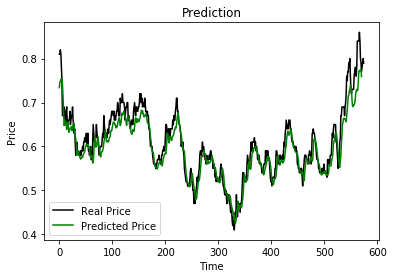

In [36]:
plt.plot(real_price, color = 'black', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

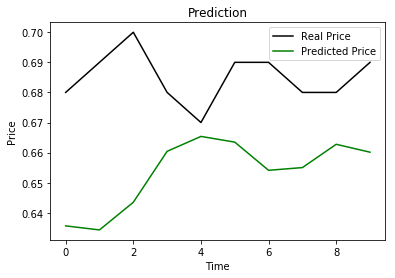

In [37]:
plt.plot(real_price[140:150], color = 'black', label = 'Real Price')
plt.plot(predicted_price[140:150], color = 'green', label = 'Predicted Price')
plt.title('Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

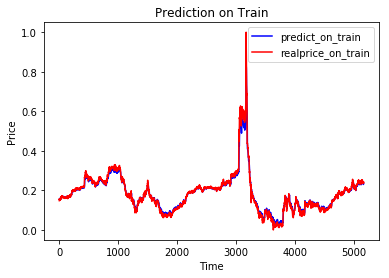

In [38]:
predict_on_train=regressor.predict(X_train)
realprice_on_train=y_train
plt.plot(predict_on_train, color = 'blue', label = 'predict_on_train')
plt.plot(realprice_on_train, color = 'red', label = 'realprice_on_train')
plt.title('Prediction on Train')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

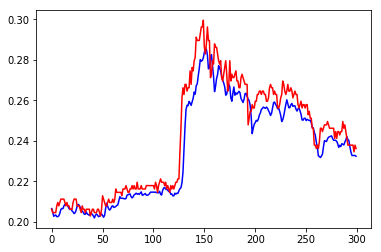

In [39]:
plt.plot(predict_on_train[300:600], color = 'blue', label = 'predict_on_train')
plt.plot(realprice_on_train[300:600], color = 'red', label = 'realprice_on_train')